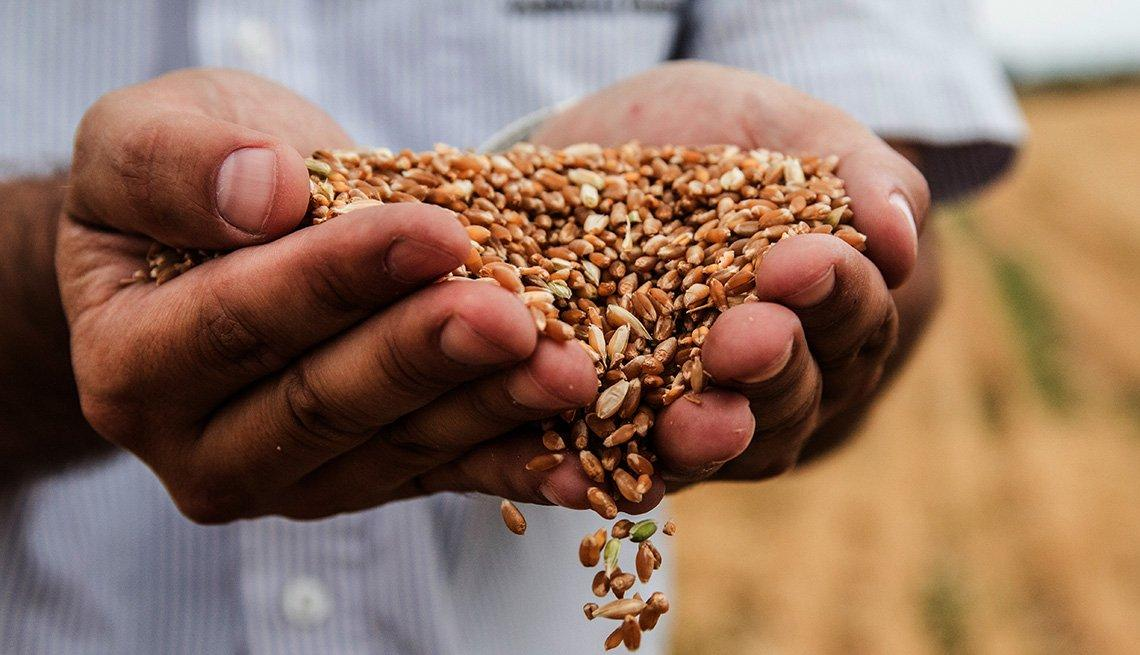

**CONTEXTE**

Dans un environnement agricole en constante évolution, les producteurs cherchent à améliorer la rentabilité et la durabilité de leurs exploitations en adaptant leurs choix de cultures aux spécificités de chaque terrain. La diversité des sols et des conditions climatiques influencent grandement la croissance des plantes et par conséquent la rentabilité , ce qui rend essentiel le choix des cultures en fonction de ces facteurs.

**OBJECTIF**

L'objectif principal du modèle est de fournir des recommandations personnalisées sur les cultures les mieux adaptées à chaque parcelle agricole, en tenant compte des caractéristiques du sol (azote, phosphore, potassium, pH) et des conditions climatiques locales (température, humidité, pluviométrie). Grâce à ces recommandations, les agriculteurs peuvent maximiser leurs rendements tout en minimisant les coûts d'amendement du sol et l'impact environnemental.

Ce modèle vise ainsi à promouvoir une agriculture durable et à permettre une gestion plus efficace des ressources naturelles, en guidant les choix de cultures en fonction des caractéristiques spécifiques et en anticipant les variations climatiques futures.

**DESCRIPTION DU DATASET**

Le Crop Recommendation Dataset utilisé est un ensemble de données qui contient des informations essentielles sur les sols et les conditions climatiques pour recommander des cultures agricoles spécifiques. IL est disponible et téléchargeable à partir de Kaggle.

Description des colonnes :

 **•Teneur en Azote (N)**: Quantité d'azote dans le sol (kg/ha).

 **• Teneur en Phosphore (P)**: Quantité de phosphore dans le sol (kg/ha).

 **• Teneur en Potassium (K)**: Quantité de potassium dans le sol (kg/ha).

 **• Température (temperature)** : Température ambiante moyenne (°C)

 **• Humidité (humidity)**: Taux d'humidité de l'air ambiant (%).

 **• PH du Sol**: PH du sol, qui indique son niveau d’acidité ou d’alcalinité.

 **• Pluviométrie (rainfall)** : La quantité de précipitations (mm).

 **• Culture Recommandée (label)**: Culture la mieux adaptée à ces conditions,
      en fonction des besoins agronomiques et climatiques.

**Importation des bibliothèques**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv('/content/Crop_recommendation.csv')
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


**Exploration des données**

Caractéristiques Utilisées

**.**N : Teneur en azote du sol (kg/ha)

**.**P : Teneur en phosphore du sol (kg/ha)

**.**K : Teneur en potassium du sol (kg/ha)

**.**Température : Température ambiante (°C)

**.**Humidité : Taux d'humidité (%)

**.**PH : Niveau de pH du sol

**.**Pluviométrie : Quantité de précipitations (mm)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<ipython-input-23-155bec989937>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='colorblind')


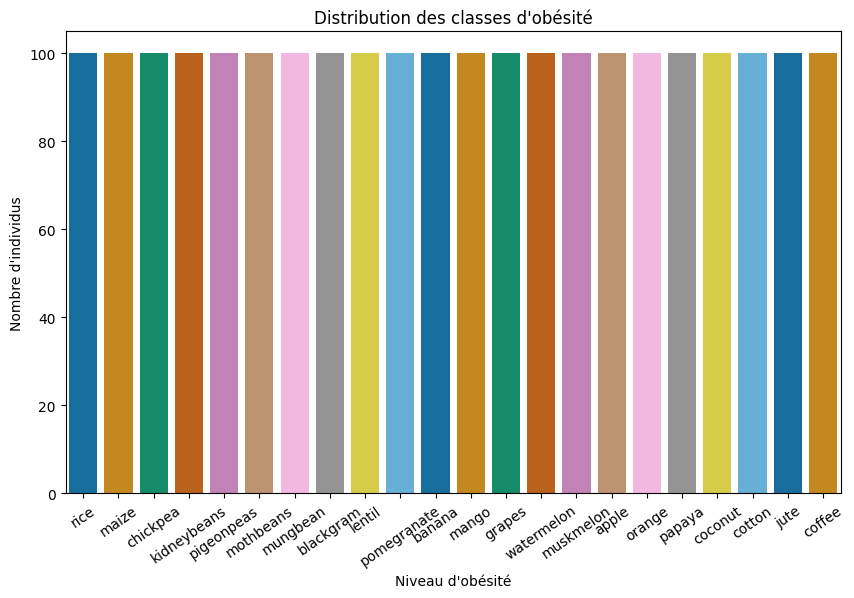

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='colorblind')
plt.xlabel('Niveau d\'obésité')
plt.ylabel('Nombre d\'individus')
plt.title('Distribution des classes d\'obésité')
plt.xticks(rotation=35)
plt.show()

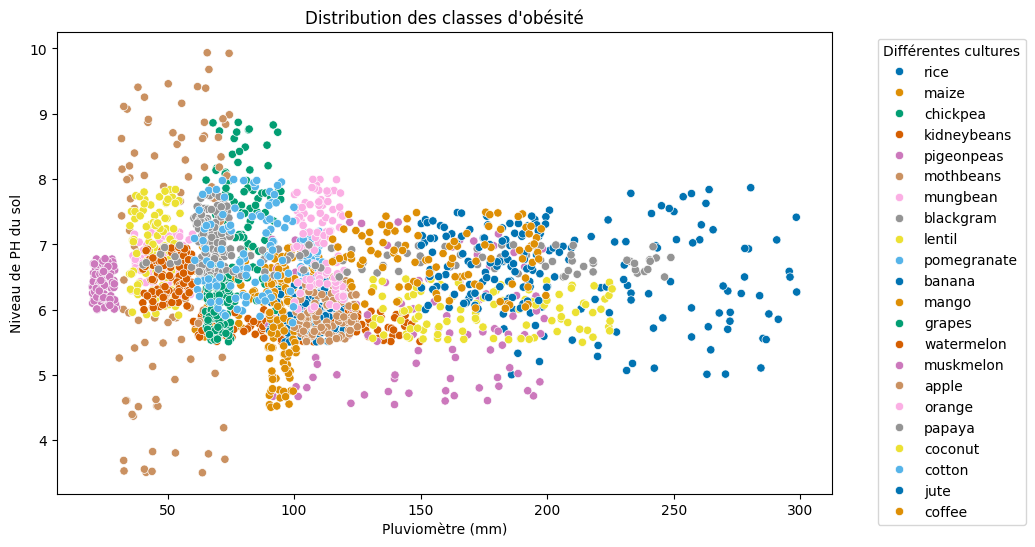

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rainfall', y= 'ph', data=data, hue='label', palette='colorblind')
plt.xlabel('Pluviomètre (mm)')
plt.ylabel('Niveau de PH du sol')
plt.title('Distribution des classes d\'obésité')
plt.legend(title='Différentes cultures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

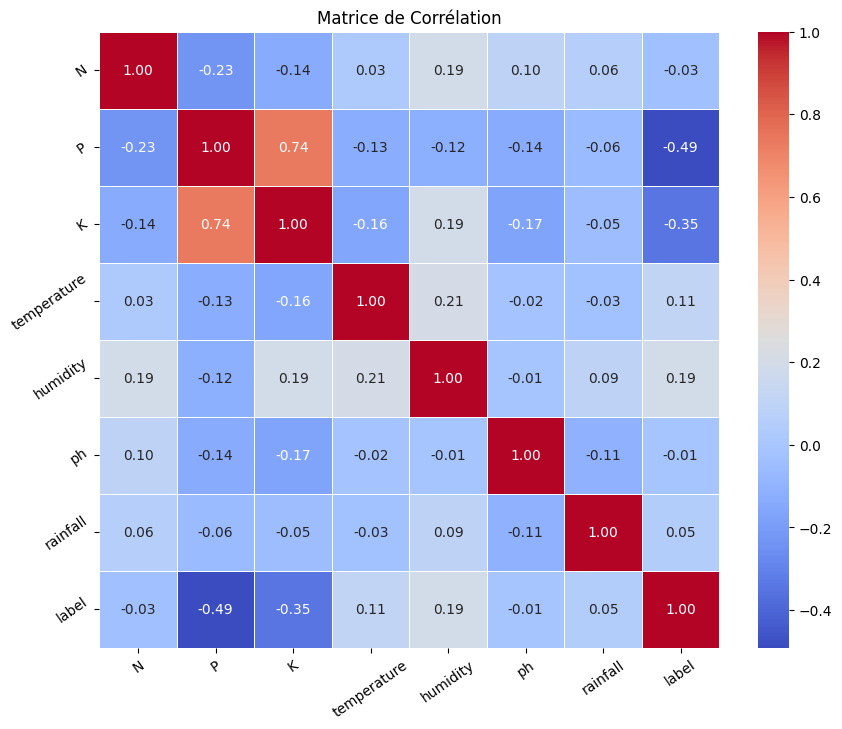

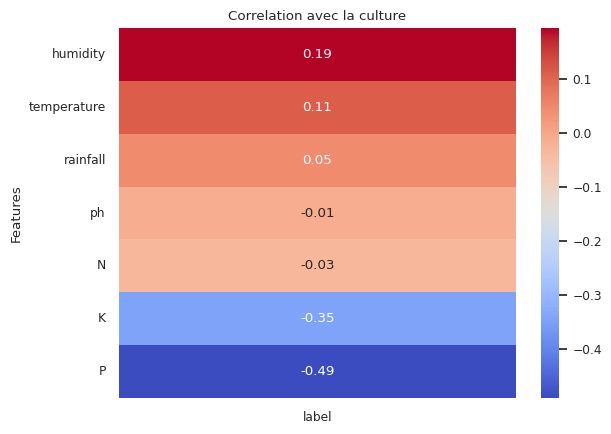

In [28]:
correlation_matrix = data_encoded.corr()

# Affichage de la matrice de corrélation sous forme de carte thermique (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.xticks(rotation=35)
plt.yticks(rotation=35)
plt.show()

# Créer un tableau de des coefficients correlation avec la colonne 'label'
corr = data_encoded.corr()
target_corr = corr['label'].drop('label')

# Trier les coefficients de corrélation dans l'ordre décroissant
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation avec la culture')
plt.ylabel('Features')
plt.show()

**Preprocessing**

In [4]:
data_encoded = data.copy()
label_encoder = LabelEncoder()
data_encoded['label'] = label_encoder.fit_transform(data_encoded['label'])
data_encoded.head(-1)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,5
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5


In [6]:
X = data_encoded.drop(columns=['label'])
y = data_encoded['label']

scaler = StandardScaler()

X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Recherche des meilleurs paramètres pour Random Forest**

In [7]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],           # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 7, 10, 15, 20, 30],           # Profondeur maximale des arbres
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10]            # Nombre minimum d'échantillons requis pour diviser un noeud
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres : ", grid_search.best_params_)

Meilleurs paramètres :  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


**1-Random Forest**

In [8]:
rf = RandomForestClassifier(n_estimators=150, min_samples_split=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

**Recherche des meilleurs paramètres pour SVC**

In [92]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres : ", grid_search.best_params_)

Meilleurs paramètres :  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


**2- SVC**

In [18]:
svc = SVC(C=1, kernel='rbf', gamma=1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test, svc_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

**Recherche des meilleurs paramètres pour KNN**

In [20]:
Knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],        # Nombre de voisins
    'weights': ['uniform', 'distance'],     # Pondération des voisins
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithme de recherche
    'leaf_size': [20, 30, 40],              # Taille des feuilles pour BallTree et KDTree
    'p': [1, 2]                             # Paramètre pour la distance Minkowski (1 = Manhattan, 2 = Euclidienne)
}

grid_search = GridSearchCV(estimator=Knn_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

Meilleurs paramètres trouvés :  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


**3- KNN**

In [21]:
Knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=20, p=1)

Knn_model.fit(X_train, y_train)
Knn_pred = Knn_model.predict(X_test)
print(classification_report(y_test, Knn_pred))
print("KNN Accuracy:", accuracy_score(y_test, Knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

**4- Gaussian Naïve Bayes**

In [23]:
GaussianNB  = GaussianNB()
GaussianNB.fit(X_train, y_train)
GaussianNB_pred = GaussianNB.predict(X_test)
print(classification_report(y_test, GaussianNB_pred))
print("GaussianNB Accuracy:", accuracy_score(y_test, GaussianNB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

**5- XGBoost**

In [31]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print(classification_report(y_test, xgb_pred))
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

<ipython-input-51-0512e0de8e7a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette="coolwarm")


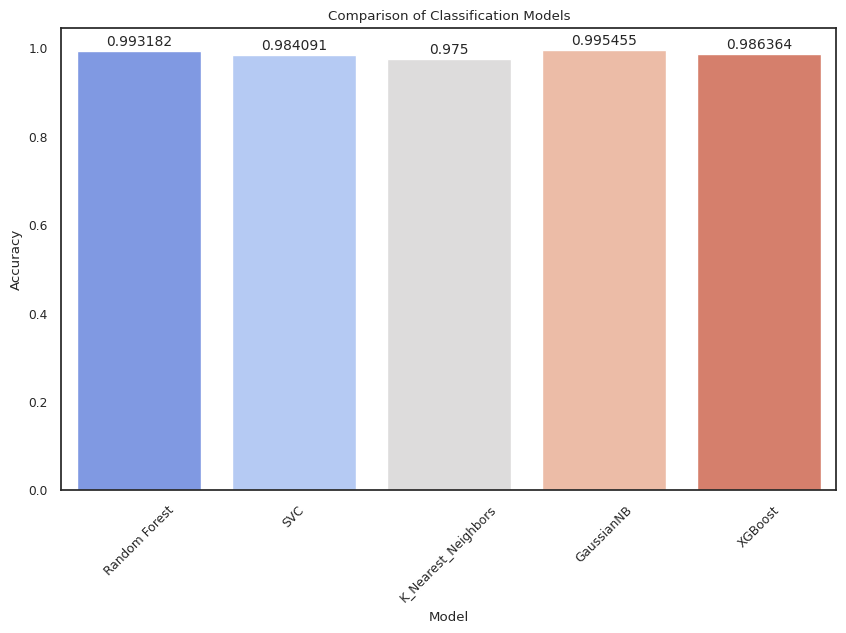

In [51]:

models = ['Random Forest', 'SVC', 'K_Nearest_Neighbors', 'GaussianNB', 'XGBoost']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svc_pred),
    accuracy_score(y_test, Knn_pred),
    accuracy_score(y_test, GaussianNB_pred),
    accuracy_score(y_test, xgb_pred)

]
df_accuracies = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})



plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette="coolwarm")

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2)

plt.xticks(rotation=45)
plt.title("Comparison of Classification Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

**Matrice de confusion du meilleur modèle**

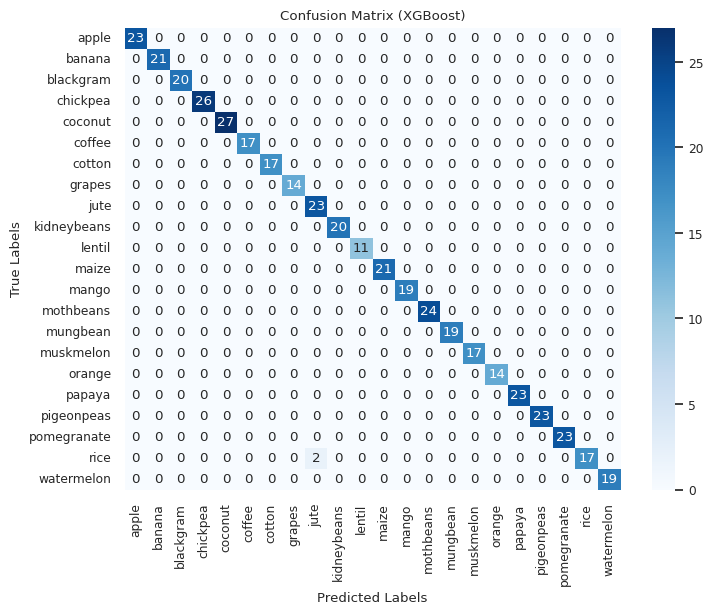

In [52]:
matrix_confus = confusion_matrix(y_test, GaussianNB_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_confus, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Nouvelle section

**CONCLUSION**

En soomme ce modèle de recommandation de cultures offre une approche plus précise et plus efficace pour une agriculture intelligente en maximisant non seulement  la rentabilité des exploitations agricoles, mais aussi en contribuant à une gestion plus durable des sols et des ressources naturelles tout en tenant compte des tendances climatiques et de la composition du sol.

Ainsi l'adaptation des cultures aux conditions locales devient  un levier stratégique pour la résilience agricole face aux défis du changement climatique et à la variabilité des conditions environnementales.